In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

# Análise Exploratória de Dados (EDA) da tabelas.

### Faço uma análise de cada tabela para entender melhor como são constituídas e se algum campo precisa de tratamento.

## Análise da Tabela de Dispositivos

In [2]:
dados = pd.read_json('../dados/Tabela_dispositivos.json')

### Como os dados da Tabela estão no padrão pt_BR, com a ',' como separador decimal, o python entende os valor como String, e não como Float.

Por isso faço o processo de localização para serem entendidos como Float pelo python

In [3]:
def convert(value):
    if not value:
        return np.nan
    return locale.atof(value)

In [4]:
dados['Quantia gasta (BRL)'] = dados['Quantia gasta (BRL)'].map(convert)

dados['Cliques em links'] = dados['Cliques em links'].map(convert)

dados['Visualizações por página'] = dados['Visualizações por página'].map(convert)

dados['Compras no website'] = dados['Compras no website'].map(convert)

dados['Compras no facebook'] = dados['Compras no facebook'].map(convert)

dados['Adicionados ao carrinho'] = dados['Adicionados ao carrinho'].map(convert)

dados['Valor de conversão adicionado ao carrinho'] = dados['Valor de conversão adicionado ao carrinho'].map(convert)

dados['Checkouts Iniciados'] = dados['Checkouts Iniciados'].map(convert)

dados['Valor de conversão de checkouts iniciados'] = dados['Valor de conversão de checkouts iniciados'].map(convert)

dados['Valor de conversão de compras'] = dados['Valor de conversão de compras'].map(convert)

dados['Compras'] = dados['Compras'].map(convert)

In [5]:
dados.head()

,Dia,Plataforma do dispositivo,Colocação,Plataforma,Alcance,Impressões,Quantia gasta (BRL),Cliques em links,Visualizações por página,Compras no website,Compras no facebook,Adicionados ao carrinho,Valor de conversão adicionado ao carrinho,Checkouts Iniciados,Valor de conversão de checkouts iniciados,Valor de conversão de compras,Compras
0,2021-07-31,All,All,All,12440.0,16114.0,72.66,141.0,101.0,6.0,NaN,48.0,5277.8,30.0,NaN,853.59,6.0
1,2021-07-31,mobile_web,All,All,104.0,170.0,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-31,mobile_web,feed,All,104.0,170.0,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-31,mobile_web,feed,facebook,104.0,170.0,0.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-07-31,mobile_app,All,All,12236.0,15679.0,70.62,136.0,98.0,6.0,NaN,48.0,5277.8,30.0,NaN,853.59,6.0


## Vejo que há vários campos com valores nulos. Os que mais chamas a atenção são 'Compras no facebook' e 'Valor de conversão de checkouts iniciados', pelo fato de terem somente valores nulos.

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dia                                        819 non-null    object 
 1   Plataforma do dispositivo                  819 non-null    object 
 2   Colocação                                  819 non-null    object 
 3   Plataforma                                 819 non-null    object 
 4   Alcance                                    742 non-null    float64
 5   Impressões                                 812 non-null    float64
 6   Quantia gasta (BRL)                        747 non-null    float64
 7   Cliques em links                           451 non-null    float64
 8   Visualizações por página                   421 non-null    float64
 9   Compras no website                         195 non-null    float64
 10  Compras no facebook       

### Olhando o resumo das colunas 'Alcance' e 'Impressões' vejo que os valores máximos parecem bem altos em relação ao resto dos dados.

In [7]:
dados.describe()

,Alcance,Impressões,Quantia gasta (BRL),Cliques em links,Visualizações por página,Compras no website,Compras no facebook,Adicionados ao carrinho,Valor de conversão adicionado ao carrinho,Checkouts Iniciados,Valor de conversão de checkouts iniciados,Valor de conversão de compras,Compras
count,742.000000,812.000000,747.000000,451.000000,421.000000,195.000000,0.0,322.000000,322.000000,322.000000,0.0,195.000000,195.000000
mean,3097.278976,3614.960591,16.735904,79.210643,68.665083,6.051282,NaN,41.465839,4194.805093,25.776398,NaN,681.111179,6.051282
std,6399.561845,8239.755955,36.935050,143.368034,119.836871,5.526640,NaN,56.046157,5674.284188,34.594487,NaN,621.372426,5.526640
min,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,NaN,1.000000,29.900000,1.000000,NaN,29.900000,1.000000
25%,16.000000,14.750000,0.080000,2.000000,2.000000,2.000000,NaN,3.000000,284.275000,2.000000,NaN,204.550000,2.000000
50%,174.000000,186.500000,0.910000,5.000000,5.000000,4.000000,NaN,12.000000,1117.100000,8.000000,NaN,475.000000,4.000000
75%,1800.000000,1234.250000,4.095000,109.500000,100.000000,9.000000,NaN,63.500000,6627.400000,40.000000,NaN,987.265000,9.000000
max,37216.000000,49688.000000,207.950000,715.000000,609.000000,23.000000,NaN,306.000000,31732.160000,175.000000,NaN,2882.130000,23.000000


### Olhando o resumo das colunas 'Alcance' e 'Impressões' vejo que os valores máximos parecem bem altos em relação ao resto dos dados.

In [8]:
def plot_boxplot(data, x):
    ax = sns.boxplot(x = x, data = data, orient = 'h')
    ax.figure.set_size_inches(18, 2)
    ax.set_title(x, fontsize = 18)
    ax.set_xlabel(x, fontsize = 14)
    plt.show()

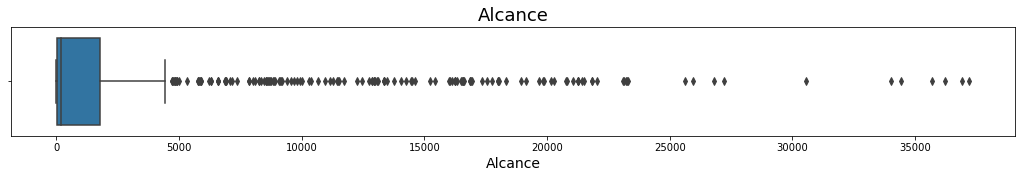

In [9]:
plot_boxplot(dados, 'Alcance')

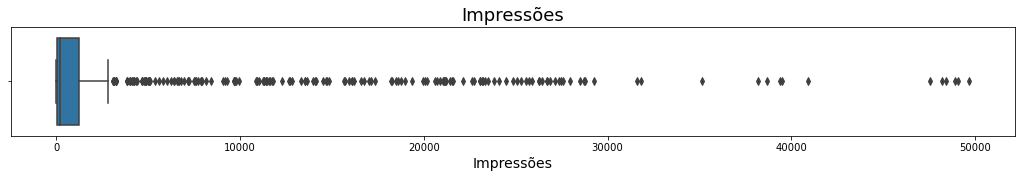

In [10]:
plot_boxplot(dados, 'Impressões')

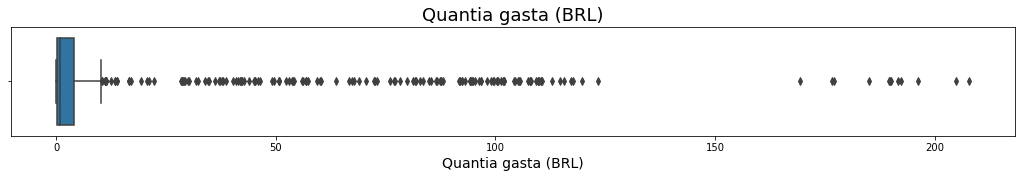

In [11]:
plot_boxplot(dados, 'Quantia gasta (BRL)')

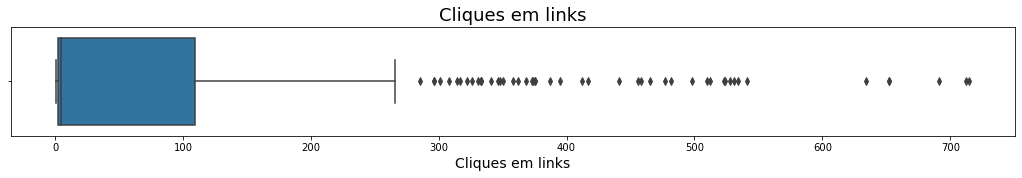

In [12]:
plot_boxplot(dados, 'Cliques em links')

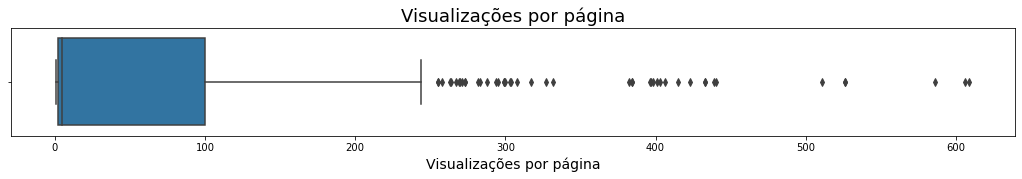

In [13]:
plot_boxplot(dados, 'Visualizações por página')

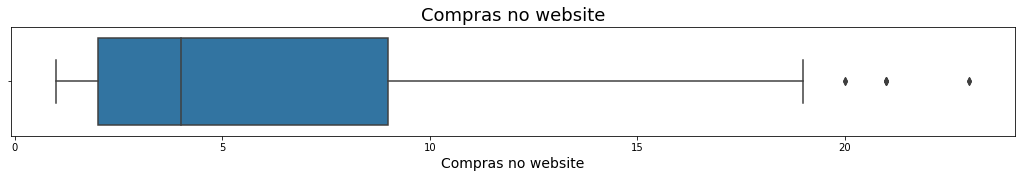

In [14]:
plot_boxplot(dados, 'Compras no website')

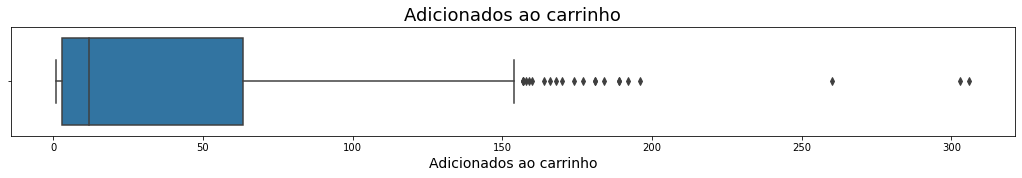

In [15]:
plot_boxplot(dados, 'Adicionados ao carrinho')

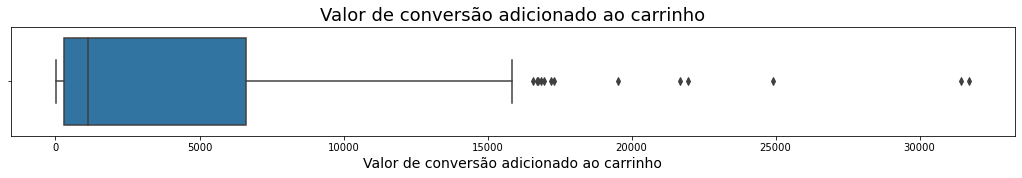

In [16]:
plot_boxplot(dados, 'Valor de conversão adicionado ao carrinho')

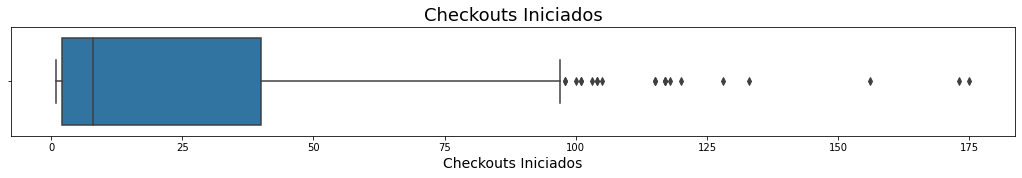

In [17]:
plot_boxplot(dados, 'Checkouts Iniciados')

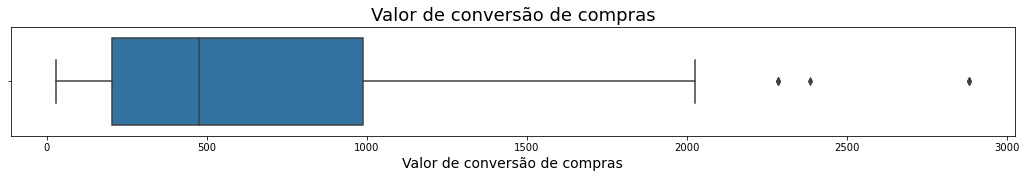

In [18]:
plot_boxplot(dados, 'Valor de conversão de compras')

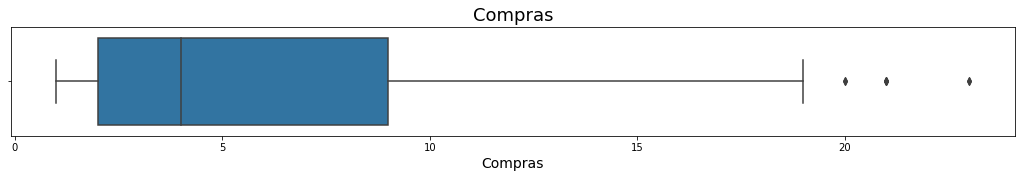

In [19]:
plot_boxplot(dados, 'Compras')